
*Pontifica Universidad Javeriana*

 *DPTO Ing Sistemas*

 **Materia** Procesamiento de Datos a Gran Escala

 **Autores:** Daniel Torres, Daniel Sandoval e Isaac Janica

**Fecha:**


In [0]:

# Se importan de las bibliotecas necesarias
import pyspark
from pyspark import SparkContext  #Importa la clase Spark context
from pyspark.sql import SQLContext, Row, Column #SqlContext permite poder hacer queries y operaciones con DataFrames de spark
from pyspark.sql.functions import *
from pyspark.sql.types import *
import pandas as pd

from pyspark.ml.feature import DenseVector, StandardScaler

import matplotlib.pyplot as plt

# File location and type
file_location = "/FileStore/tables/NYPD_Arrest_Data__Year_to_Date__20240301.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

df = spark.read.csv(file_location, header=first_row_is_header, inferSchema=infer_schema, sep=delimiter)
dfp = df.toPandas()
df.limit(4).toPandas()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261265483,01/03/2023,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105,ROBBERY,PL 1600500,F,B,49,0,18-24,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793)
1,261271301,01/03/2023,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL 1211200,F,S,120,0,25-44,M,WHITE,962808,174275,40.644996,-74.077263,POINT (-74.077263 40.644996)
2,261336449,01/04/2023,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105,ROBBERY,PL 1601001,F,K,61,0,<18,M,BLACK,995118,155708,40.594054,-73.960866,POINT (-73.960866 40.594054)
3,261328047,01/04/2023,105,STRANGULATION 1ST,106,FELONY ASSAULT,PL 1211200,F,Q,114,0,18-24,M,BLACK,1007694,219656,40.769552,-73.915361,POINT (-73.915361 40.769552)


## **Colección y descripción de los datos:**
En este apartado se realiza la carga de los datos y se describen los datos según los siguientes elementos:
- Tamaño: número de columnas y de filas.
- Su tipo.
- Nombre.

Todo esto se puede ver más a fondo en el informe:
https://docs.google.com/document/d/1m7ay9uNr1dauOqrrx8NblZEC2QaYxdmR/edit?rtpof=true


### 'NombreColumna 'TipoDeDato':

In [0]:
df.dtypes

Out[2]: [('ARREST_KEY', 'string'),
 ('ARREST_DATE', 'string'),
 ('PD_CD', 'string'),
 ('PD_DESC', 'string'),
 ('KY_CD', 'string'),
 ('OFNS_DESC', 'string'),
 ('LAW_CODE', 'string'),
 ('LAW_CAT_CD', 'string'),
 ('ARREST_BORO', 'string'),
 ('ARREST_PRECINCT', 'string'),
 ('JURISDICTION_CODE', 'string'),
 ('AGE_GROUP', 'string'),
 ('PERP_SEX', 'string'),
 ('PERP_RACE', 'string'),
 ('X_COORD_CD', 'string'),
 ('Y_COORD_CD', 'string'),
 ('Latitude', 'string'),
 ('Longitude', 'string'),
 ('New Georeferenced Column', 'string')]

###Numero de Columnas y de Filas del DataSet:

In [0]:
print("Num columnas", len(df.columns))
print("Num filas", df.count())

Num columnas 19
Num filas 226872


### Conteo de nulos dentro del DataSet

In [0]:
# Print statement
print("Nulos por columna dentro del dataset de Collisions")

# Create a list to store the null counts
null_counts = []

# Iterate over each column to count null values
for col_name in df.columns:
    # Count the null values in the column
    null_count = df.select(col(col_name)).where(col(col_name).isNull()).count()
    # Append the null count to the list
    null_counts.append((col_name, null_count))

# Convert the null counts list to a PySpark DataFrame
null_counts_df = spark.createDataFrame(null_counts, ["Column Name", "Null Count"])

# Display the DataFrame
null_counts_df.show()

Nulos por columna dentro del dataset de Collisions
+--------------------+----------+
|         Column Name|Null Count|
+--------------------+----------+
|          ARREST_KEY|         0|
|         ARREST_DATE|         0|
|               PD_CD|         2|
|             PD_DESC|         0|
|               KY_CD|        17|
|           OFNS_DESC|         0|
|            LAW_CODE|         0|
|          LAW_CAT_CD|      1599|
|         ARREST_BORO|         0|
|     ARREST_PRECINCT|         0|
|   JURISDICTION_CODE|         0|
|           AGE_GROUP|         0|
|            PERP_SEX|         0|
|           PERP_RACE|         0|
|          X_COORD_CD|         0|
|          Y_COORD_CD|         0|
|            Latitude|         0|
|           Longitude|         0|
|New Georeferenced...|         0|
+--------------------+----------+



## Comprensión del significado de cada atributos:
En este caso, se hizo un diccionario de datos del cuál se tiene el siguiente link con el tipo de dato y la descripción de este:
https://docs.google.com/spreadsheets/d/1qxFz3B2A_1QBr87w9vNeHROOM842oU2F/edit#gid=1666817735


Lo diccionarios contienen el tipo de datos de cada atributo, a que hacen alusión y puede que en algunos casos, que columnas no se encuentran a pesar de que fueron parte de la misma tabla en el DBMS.

## **Descripción general del contenido de los conjuntos de datos:**


**Lo que se encontró en el conjunto de datos  fue:**
- El DataSet cuenta con 25 columnas y 4154748, un número bastante grande y que genera el tiempo de procesamiento de este sea mucho mayor que el DataSet de arrestos.
- Se cuenta con columnas como CRASH_DATE y CRASH_TIME que actualmente de tipo tiempo pero que pueden ser convertidas en en tipo Date y tipo Time. También hay otras variables en dónde estas son de tipo objeto pero podrían ser convertidas a variable de tipo numérico.
- Con una revisión a priori, el dataset presenta varias columnas con una enorme cantidad de nulos (hay columnas dónde el 50% o más de los registros son valores nulos).
- Este DataSet cuenta con 3 tipos diferentes de ID COLLISION_ID, UNIQUE_ID Y VEHICLE_ID. Dentro del diccionario de datos se explica que esto es debido a que esta tabla/DataSet es el resultado de un JOIN hecho entre dos tablas de una base de datos de la NYPD.
- Las columnas que no se entienden a priori son las de CONTRIBUTING_FACTOR.


# **Exploración de los datos:**

En ese apartado se proccede a hacer uso de estadística descriptiva para tener una idea general de los datos por columnas.
Se hará uso de histogramas, diagramas de pie y diagramas de líneas para poder graficar las diferentes variables. En el caso de las variables cualitativas se va a utilizar el diagrama de pie, en en el caso de las variables discretas se va a hacer uso diagramas de línea y de histogramas.

### Exploración de la columna 'OFNS_DESC' o en español

In [0]:
value_counts = dfp.groupby('OFNS_DESC').size()


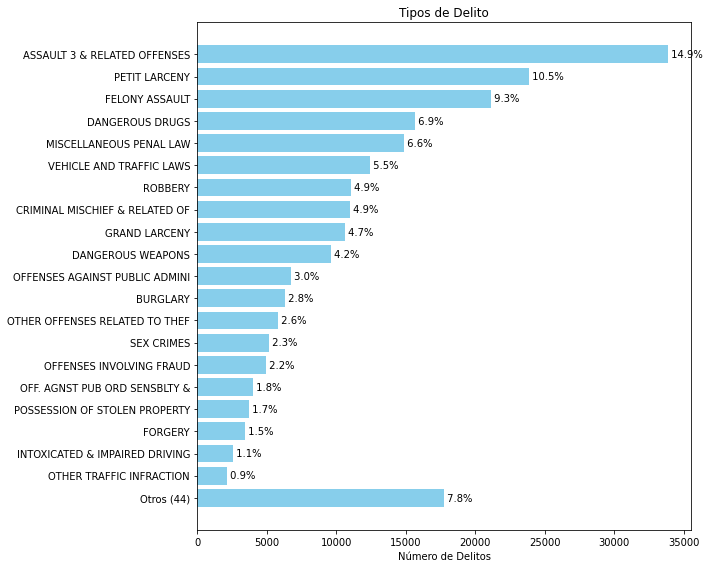

In [0]:

# Obtener los datos ordenados por frecuencia
sorted_counts = value_counts.sort_values(ascending=False)

# Obtener las 10 categorías más frecuentes
top_categories = sorted_counts.head(20)

# Sumar los conteos de las categorías que no están en las 10 más frecuentes y colocarlos en "Otros"
otros_count = sorted_counts[20:].sum()
top_categories[f'Otros ({len(sorted_counts[20:])})'] = otros_count

# Crear un gráfico de barras horizontales con las categorías organizadas de mayor a menor
plt.figure(figsize=(10, 8))  # Ajustar el tamaño de la figura según sea necesario
bars = plt.barh(top_categories.index, top_categories.values, color='skyblue')  # Gráfico de barras horizontal

plt.xlabel('Número de Delitos')  # Etiqueta del eje x
plt.title('Tipos de Delito')  # Título del gráfico
plt.gca().invert_yaxis()  # Invertir el eje y para que aparezcan los índices en orden descendente

# Mostrar los porcentajes en las barras
for bar in bars:
    yval = bar.get_height()  # Obtener la altura de la barra
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f' {bar.get_width() / sorted_counts.sum() * 100:.1f}%  ', 
             va='center')  # Mostrar el texto con el porcentaje

plt.tight_layout()  # Ajustar el diseño para evitar cortes
plt.show()

In [0]:

# plt.figure(figsize=(16, 14))  # Adjust the figure size as needed
# plt.pie(value_counts.values, labels=value_counts.index, autopct="%1.1f%%")  # Format as percentage
# plt.title("Tipo de Delito")
# plt.tight_layout()
# plt.show()

<Figure size 1008x576 with 0 Axes>

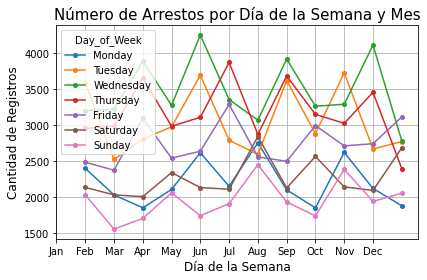

In [0]:
import calendar

# Convertir la columna de fecha a tipo datetime
dfp['ARREST_DATE'] = pd.to_datetime(dfp['ARREST_DATE'])

# Extraer el día de la semana y el mes
dfp['Day_of_Week'] = dfp['ARREST_DATE'].dt.day_name()
dfp['Month'] = dfp['ARREST_DATE'].dt.month

# Calcular el conteo de registros por día de la semana y mes
register_count = dfp.groupby(['Month', 'Day_of_Week']).size().unstack()

# Ordenar los días de la semana en orden lógico
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
register_count = register_count.reindex(columns=days_order)

# Graficar
plt.figure(figsize=(14, 8))  # Ajustar el tamaño de la figura según tus necesidades
register_count.plot(kind='line', marker='o', markersize=4, linestyle='-')  
plt.title('Número de Arrestos por Día de la Semana y Mes', fontsize=15)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Cantidad de Registros', fontsize=12)

# Etiquetas de los meses
month_labels = [calendar.month_name[i][:3] for i in range(1, 13)]
plt.xticks(ticks=range(12), labels=month_labels)  # Etiquetas de meses abreviadas

# Mostrar la cuadrícula
plt.grid(True)

# Ajustar el diseño
plt.tight_layout()

# Mostrar la visualización
plt.show()

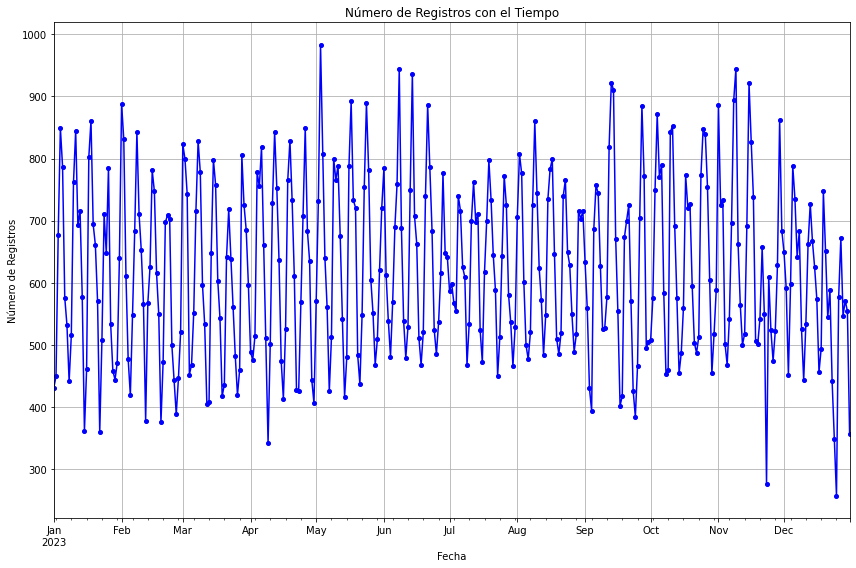

In [0]:
dfp['ARREST_DATE'] = pd.to_datetime(dfp['ARREST_DATE'])

# Agrupar por fecha y contar el número de registros por fecha
register_count = dfp.groupby('ARREST_DATE').size()

# Crear la visualización
plt.figure(figsize=(12, 8))  # Ajusta el tamaño según tus necesidades
register_count.plot(kind='line', color='blue', marker='o', markersize=4, linestyle='-')

# Añadir título y etiquetas de ejes
plt.title('Número de Registros con el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Número de Registros')

# Ajustar los límites del eje x si es necesario
# plt.xlim(min_date, max_date)  # Establece los límites de fecha según tus datos

# Mostrar la cuadrícula
plt.grid(True)

# Ajustar el diseño
plt.tight_layout()

# Mostrar la visualización
plt.show()

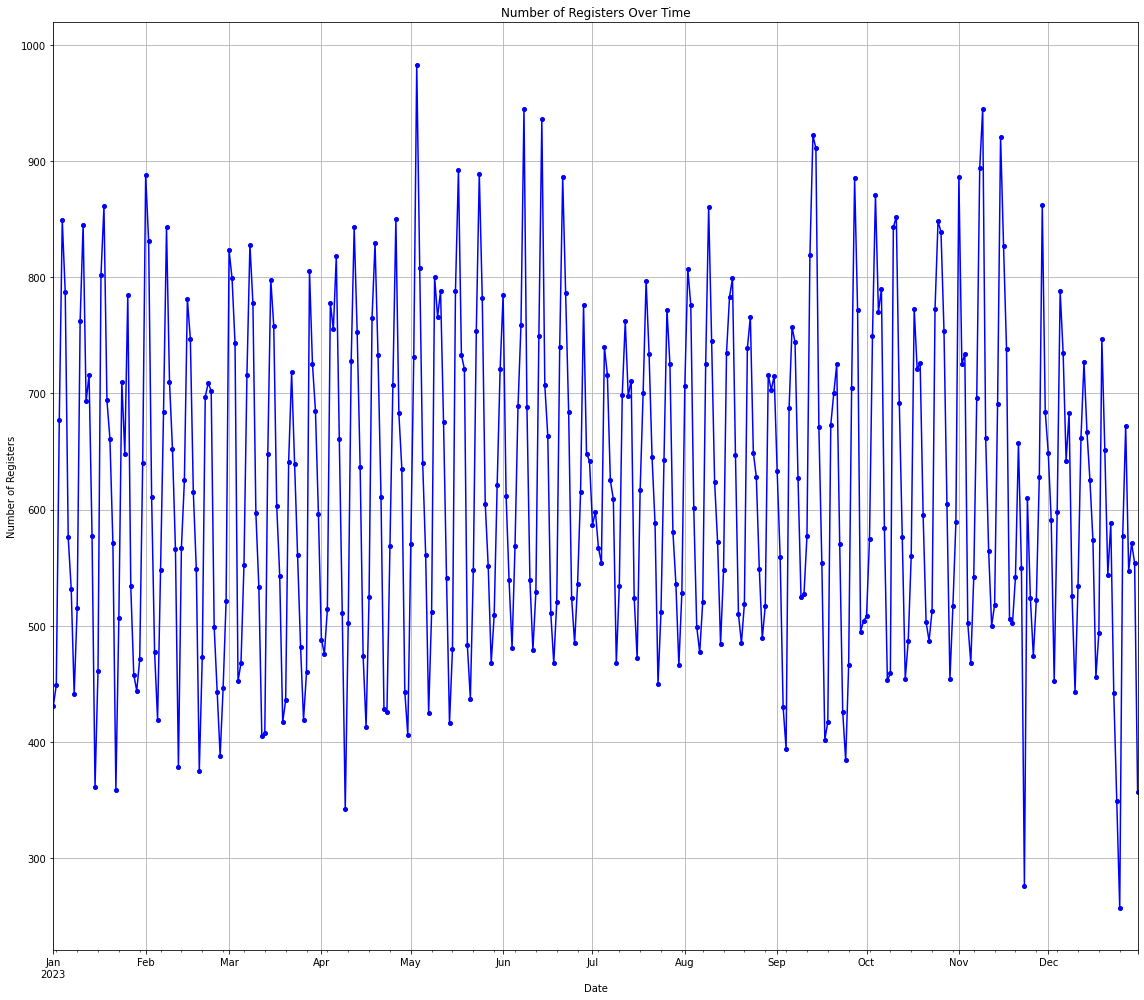

In [0]:
dfp['ARREST_DATE'] = pd.to_datetime(dfp['ARREST_DATE'])
register_count = dfp.groupby('ARREST_DATE').size()


plt.figure(figsize=(16, 14))
register_count.plot(kind='line', color='blue', marker='o', markersize=4, linestyle='-')
plt.title('Number of Registers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Registers')
plt.grid(True)
plt.tight_layout()
plt.show()

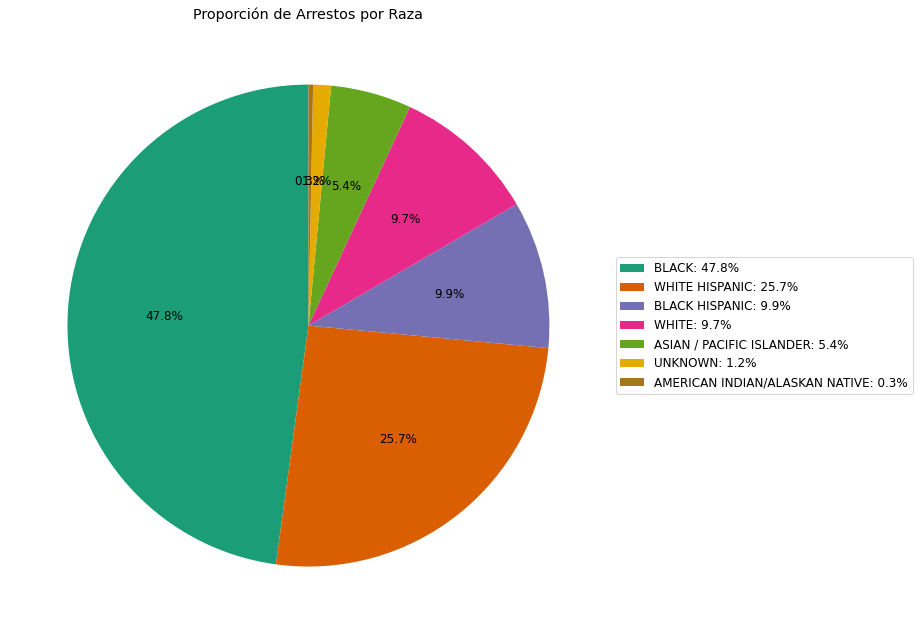

In [0]:
import matplotlib.pyplot as plt

# Agrupar por raza y contar arrestos
value_counts = dfp['PERP_RACE'].value_counts()

# Calcular porcentaje de cada categoría
percentages = 100 * value_counts / len(dfp)

# Ordenar los valores por cantidad de arrestos descendente
percentages = percentages.sort_values(ascending=False)

# Crear la figura y el gráfico
plt.figure(figsize=(12, 10))

# Definir una paleta de colores más oscura para las categorías más grandes
colors = plt.cm.Dark2.colors[:len(percentages)]

# Graficar el pastel con porcentajes y etiquetas
wedges, labels, autopct = plt.pie(percentages, labels=None, autopct="%1.1f%%", startangle=90, colors=colors)

# Configurar el tamaño de letra para los porcentajes dentro del pastel
for autotext in autopct:
    autotext.set_fontsize('large')  # Ajustar tamaño de letra a 'large'

# Añadir etiquetas fuera del pastel con nombres y porcentajes
label_texts = [f"{race}: {percentage:.1f}%" for race, percentage in zip(percentages.index, percentages)]
plt.legend(wedges, label_texts, loc="center left", fontsize='large', bbox_to_anchor=(1, 0, 0.5, 1))

# Añadir título
plt.title("Proporción de Arrestos por Raza", fontsize='x-large')

# Ajustar el diseño para que no se recorte la leyenda
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [0]:
# value_counts = dfp.groupby('PERP_RACE').size()

# plt.figure(figsize=(16, 14))  # Adjust the figure size as needed
# plt.pie(value_counts.values, labels=value_counts.index, autopct="%1.1f%%")  # Format as percentage
# plt.title("Delitos cometidos por raza")
# plt.tight_layout()
# plt.show()

In [0]:
# # Agrupar por género y contar delitos cometidos
# value_counts = dfp.groupby('PERP_SEX').size()

# # Calcular porcentaje de cada categoría
# percentages = 100 * value_counts / len(dfp)

# # Ordenar los valores por porcentaje descendente
# percentages = percentages.sort_values(ascending=False)

# # Crear la figura y el gráfico con tamaño ajustado
# plt.figure(figsize=(12, 10))

# # Definir una paleta de colores más oscura para las categorías más grandes
# colors = plt.cm.Dark2.colors[:len(percentages)]

# # Graficar el pastel con porcentajes y etiquetas
# wedges, labels, autopct = plt.pie(percentages, labels=None, autopct="%1.1f%%", startangle=90, colors=colors)

# # Configurar el tamaño de letra para los porcentajes dentro del pastel
# for autotext in autopct:
#     autotext.set_fontsize('large')  # Ajustar tamaño de letra a 'large'

# # Añadir etiquetas fuera del pastel con nombres y porcentajes
# label_texts = [f"{sex}: {percentage:.1f}%" for sex, percentage in zip(percentages.index, percentages)]
# plt.legend(wedges, label_texts, loc="center left", fontsize='large', bbox_to_anchor=(1, 0, 0.5, 1))

# # Añadir título
# plt.title("Delito por género", fontsize='x-large')

# # Ajustar el diseño para que no se recorte la leyenda
# plt.tight_layout()

# # Mostrar el gráfico
# plt.show()

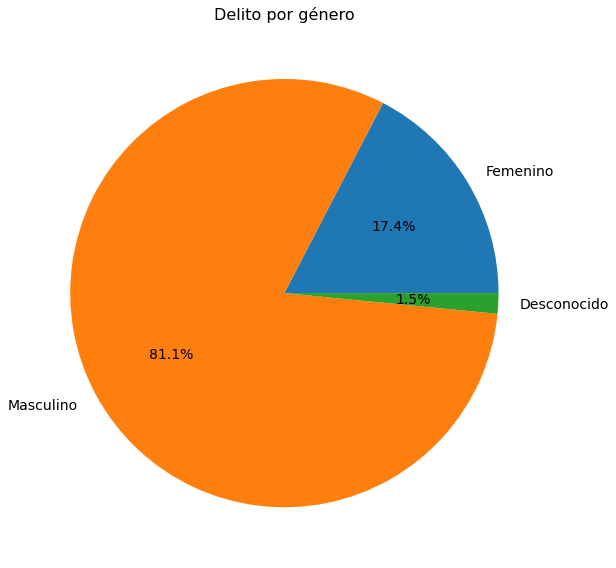

In [0]:
# Calcular value_counts para PERP_SEX
value_counts = dfp.groupby('PERP_SEX').size()

# Renombrar las etiquetas según tus especificaciones
gender_labels = {'F': 'Femenino', 'M': 'Masculino', 'U': 'Desconocido'}
labels = [gender_labels.get(label, label) for label in value_counts.index]

# Configurar el tamaño del gráfico y otros parámetros
plt.figure(figsize=(10, 8))  # Ajustar el tamaño según sea necesario
plt.pie(value_counts.values, labels=labels, autopct="%1.1f%%", textprops={'fontsize': 14})  # Ajustar el tamaño del texto
plt.title("Delito por género", fontsize=16)  # Ajustar el título
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [0]:
# value_counts = dfp.groupby('PERP_SEX').size()

# plt.figure(figsize=(16, 14))  # Adjust the figure size as needed
# plt.pie(value_counts.values, labels=value_counts.index, autopct="%1.1f%%")  # Format as percentage
# plt.title("Delito por género")
# plt.tight_layout()
# plt.show()

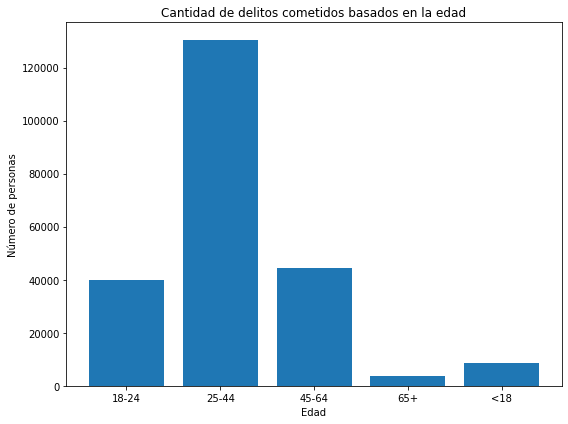

In [0]:

# Get the value counts
value_counts = dfp.groupby("AGE_GROUP").size()

# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.bar(value_counts.index, value_counts.values)
plt.xlabel("Edad")  
plt.ylabel("Número de personas")
plt.title("Cantidad de delitos cometidos basados en la edad")
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Limpieza de Datos


### Inputación de datos en la columnas 'KY_CD' basado en valores de la columna 'PD_CD'

En este apartado se crea un diccionario en dónde se va a almacenar los valores equivalente de PD_CD para KY_CD debido a que esta última columna cuenta con más valores nulos que la primera. Con esto se espera que al momento de haber un nulo en KY_CD, este sea rellenado usando un diccionario que almacena una "tabla de equivalencias" entre los valores de PD_CD y KY_CD. Por ejemplo digamos que el diccionario alamcena que {101: 304, 102: 702} y encuentra que el valor en KY_CD es nulo pero que en PC_CD es 101, entonces va a reemplazar el valor faltante por 304. 

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when, udf
from pyspark.sql.types import *


# Assuming you have a DataFrame named 'df' with columns 'PD_CD' and 'KY_CD'
# Replace 'PD_CD' and 'KY_CD' with the actual names of your columns

# Collect distinct pairs of (PD_CD, KY_CD) where they are not necessarily equal but represent corresponding values
pairs = df.select("PD_CD", "KY_CD").distinct().filter(df.PD_CD.isNotNull() & df.KY_CD.isNotNull()).collect()

# Construct a dictionary to store the relations
relations_dict = {}
for row in pairs:
    pd_cd = row["PD_CD"]
    ky_cd = row["KY_CD"]
    if pd_cd not in relations_dict:
        relations_dict[pd_cd] = []
    relations_dict[pd_cd].append(ky_cd)

# Print the dictionary
print("Relations:")
for pd_cd, ky_cd_list in relations_dict.items():
    print(f"PD_CD: {pd_cd} -> KY_CDs: {ky_cd_list}")

def fill_null_with_dict(value, relations_dict):
    return relations_dict.get(value, value)

fill_null_with_dict_udf = udf(lambda x: fill_null_with_dict(x, relations_dict), StringType())


df_filled = df.withColumn("KY_CD", when(col("KY_CD").isNull(), fill_null_with_dict_udf(col("PD_CD"))).otherwise(col("KY_CD")))

nulls_count_ky_cd = df_filled.filter(col("KY_CD").isNull()).count()

# Print the count
print("Number of null values in KY_CD:", nulls_count_ky_cd)




Relations:
PD_CD: 511 -> KY_CDs: ['235']
PD_CD: 129 -> KY_CDs: ['101']
PD_CD: 183 -> KY_CDs: ['124']
PD_CD: 514 -> KY_CDs: ['117']
PD_CD: 409 -> KY_CDs: ['109']
PD_CD: 117 -> KY_CDs: ['126']
PD_CD: 185 -> KY_CDs: ['124']
PD_CD: 696 -> KY_CDs: ['126']
PD_CD: 969 -> KY_CDs: ['881']
PD_CD: 638 -> KY_CDs: ['578']
PD_CD: 173 -> KY_CDs: ['233']
PD_CD: 157 -> KY_CDs: ['104']
PD_CD: 289 -> KY_CDs: ['354']
PD_CD: 198 -> KY_CDs: ['126']
PD_CD: 505 -> KY_CDs: ['117']
PD_CD: 727 -> KY_CDs: ['113']
PD_CD: 799 -> KY_CDs: ['363']
PD_CD: 125 -> KY_CDs: ['103']
PD_CD: 705 -> KY_CDs: ['358']
PD_CD: 645 -> KY_CDs: ['351']
PD_CD: 439 -> KY_CDs: ['109']
PD_CD: 519 -> KY_CDs: ['117']
PD_CD: 441 -> KY_CDs: ['110']
PD_CD: 16 -> KY_CDs: ['995']
PD_CD: 563 -> KY_CDs: ['356']
PD_CD: 772 -> KY_CDs: ['112']
PD_CD: 476 -> KY_CDs: ['343']
PD_CD: 939 -> KY_CDs: ['881']
PD_CD: 792 -> KY_CDs: ['118']
PD_CD: 268 -> KY_CDs: ['121']
PD_CD: 750 -> KY_CDs: ['359']
PD_CD: 523 -> KY_CDs: ['117']
PD_CD: 904 -> KY_CDs: ['119']


### Eliminación de columnas
Se van a eliminar las columnas: ARREST_KEY, LAW_CODE, JURISDICTION_CODE, New Georeferenced Column, LAW_CAT_CD y KY_CD

In [0]:
#se va eliminar la columa de KY_CD porque PD_CD ya contiene esos datos en otro formato

df_filled = df_filled.drop("KY_CD")

# También se van a eliminar las columa ARREST_KEY, LAW_CODE, JURISDICTION_CODE, New Georeferenced Column  y LAW_CAT_CD porque no aporta nada para el ejercicio de análisis

df_filled = df_filled.drop("ARREST_KEY")
df_filled = df_filled.drop("LAW_CODE")
df_filled = df_filled.drop("JURISDICTION_CODE")
df_filled = df_filled.drop('New Georeferenced Column')
df_filled = df_filled.drop('LAW_CAT_CD')


df_filled.limit(4).toPandas()



,ARREST_DATE,PD_CD,PD_DESC,OFNS_DESC,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,01/03/2023,397,"ROBBERY,OPEN AREA UNCLASSIFIED",ROBBERY,B,49,18-24,M,BLACK,1027430,251104,40.855793,-73.843908
1,01/03/2023,105,STRANGULATION 1ST,FELONY ASSAULT,S,120,25-44,M,WHITE,962808,174275,40.644996,-74.077263
2,01/04/2023,397,"ROBBERY,OPEN AREA UNCLASSIFIED",ROBBERY,K,61,<18,M,BLACK,995118,155708,40.594054,-73.960866
3,01/04/2023,105,STRANGULATION 1ST,FELONY ASSAULT,Q,114,18-24,M,BLACK,1007694,219656,40.769552,-73.915361


###Estandarización de la fecha: 

In [0]:
#Convertir la fecha de arresto de tipo string a tipo fecha

df_filled = df_filled.withColumn('ARREST_DATE', to_date(df_filled['ARREST_DATE'], 'MM/dd/yyyy'))
df_filled.dtypes

Out[13]: [('ARREST_DATE', 'date'),
 ('PD_CD', 'string'),
 ('PD_DESC', 'string'),
 ('OFNS_DESC', 'string'),
 ('ARREST_BORO', 'string'),
 ('ARREST_PRECINCT', 'string'),
 ('AGE_GROUP', 'string'),
 ('PERP_SEX', 'string'),
 ('PERP_RACE', 'string'),
 ('X_COORD_CD', 'string'),
 ('Y_COORD_CD', 'string'),
 ('Latitude', 'string'),
 ('Longitude', 'string')]

In [0]:
from pyspark.ml.feature import StringIndexer
from pyspark.sql import SparkSession



spark = SparkSession.builder \
    .appName("Categorical Encoding") \
    .config("spark.kryoserializer.buffer.max", "512m") \
    .getOrCreate()

# Assuming your DataFrame is called 'df_filled'
columns_to_encode = [
     'PD_CD', 'PD_DESC', 'OFNS_DESC',
      'ARREST_BORO', 'ARREST_PRECINCT',
    'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD', 'Y_COORD_CD',
    'Latitude', 'Longitude'
]

# Fill NULL values with a default value
default_value = "unknown"
df_filled = df_filled.na.fill(default_value)


# Print statement
print("Nulos por columna dentro del dataset de Collisions")

# Create a list to store the null counts
null_counts = []

# Iterate over each column to count null values
for col_name in df_filled.columns:
    # Count the null values in the column
    null_count = df_filled.select(col(col_name)).where(col(col_name).isNull()).count()
    # Append the null count to the list
    null_counts.append((col_name, null_count))

# Convert the null counts list to a PySpark DataFrame
null_counts_df = spark.createDataFrame(null_counts, ["Column Name", "Null Count"])

# Display the DataFrame
null_counts_df.show()



Nulos por columna dentro del dataset de Collisions
+---------------+----------+
|    Column Name|Null Count|
+---------------+----------+
|    ARREST_DATE|         0|
|          PD_CD|         0|
|        PD_DESC|         0|
|      OFNS_DESC|         0|
|    ARREST_BORO|         0|
|ARREST_PRECINCT|         0|
|      AGE_GROUP|         0|
|       PERP_SEX|         0|
|      PERP_RACE|         0|
|     X_COORD_CD|         0|
|     Y_COORD_CD|         0|
|       Latitude|         0|
|      Longitude|         0|
+---------------+----------+



In [0]:

# Create a list to store StringIndexers for each column
indexers = []

# Create StringIndexer for each column
for column in columns_to_encode:
    try:
        indexer = StringIndexer(inputCol=column, outputCol=column+"_index", handleInvalid="skip").fit(df_filled)
        indexers.append(indexer)
    except Exception as e:
        print(f"Error processing column '{column}': {e}")

# Apply StringIndexers to DataFrame
for indexer in indexers:
    df_filled = indexer.transform(df_filled)

# Collect distinct values for each encoded column
#distinct_values = {}
#for column in columns_to_encode:
 #   distinct_values[column] = df_filled.select(column+"_index").distinct().rdd.map(lambda row: row[0]).collect()

# Print distinct values for each encoded column
#for column, values in distinct_values.items():
 #   print(f"Distinct values for '{column}': {values}")

df_filled.limit(4).toPandas()

,ARREST_DATE,PD_CD,PD_DESC,OFNS_DESC,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,...,OFNS_DESC_index,ARREST_BORO_index,ARREST_PRECINCT_index,AGE_GROUP_index,PERP_SEX_index,PERP_RACE_index,X_COORD_CD_index,Y_COORD_CD_index,Latitude_index,Longitude_index
0,2023-01-03,397,"ROBBERY,OPEN AREA UNCLASSIFIED",ROBBERY,B,49,18-24,M,BLACK,1027430,...,6.0,1.0,36.0,2.0,0.0,0.0,40.0,40.0,40.0,40.0
1,2023-01-03,105,STRANGULATION 1ST,FELONY ASSAULT,S,120,25-44,M,WHITE,962808,...,2.0,4.0,9.0,0.0,0.0,3.0,2.0,2.0,2.0,2.0
2,2023-01-04,397,"ROBBERY,OPEN AREA UNCLASSIFIED",ROBBERY,K,61,<18,M,BLACK,995118,...,6.0,0.0,55.0,3.0,0.0,0.0,53.0,53.0,53.0,53.0
3,2023-01-04,105,STRANGULATION 1ST,FELONY ASSAULT,Q,114,18-24,M,BLACK,1007694,...,2.0,3.0,20.0,2.0,0.0,0.0,11.0,12.0,12.0,11.0


In [0]:
condition = (df_filled['OFNS_DESC'] == 'ROBBERY')

# Create a new column 'Robbery_Binary' with value 1 if the condition is true, else 0
df_filled = df_filled.withColumn('Robbery_Binary', when(condition, 1).otherwise(0))


In [0]:
df_filled.dtypes

Out[17]: [('ARREST_DATE', 'date'),
 ('PD_CD', 'string'),
 ('PD_DESC', 'string'),
 ('OFNS_DESC', 'string'),
 ('ARREST_BORO', 'string'),
 ('ARREST_PRECINCT', 'string'),
 ('AGE_GROUP', 'string'),
 ('PERP_SEX', 'string'),
 ('PERP_RACE', 'string'),
 ('X_COORD_CD', 'string'),
 ('Y_COORD_CD', 'string'),
 ('Latitude', 'string'),
 ('Longitude', 'string'),
 ('PD_CD_index', 'double'),
 ('PD_DESC_index', 'double'),
 ('OFNS_DESC_index', 'double'),
 ('ARREST_BORO_index', 'double'),
 ('ARREST_PRECINCT_index', 'double'),
 ('AGE_GROUP_index', 'double'),
 ('PERP_SEX_index', 'double'),
 ('PERP_RACE_index', 'double'),
 ('X_COORD_CD_index', 'double'),
 ('Y_COORD_CD_index', 'double'),
 ('Latitude_index', 'double'),
 ('Longitude_index', 'double'),
 ('Robbery_Binary', 'int')]

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import monotonically_increasing_id
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Assuming you already have a SparkSession named spark and your DataFrame df_filled is defined

index_columns = [
    'ARREST_BORO_index',
    'AGE_GROUP_index',
    'PERP_RACE_index',
    'PERP_SEX_index',
    'Robbery_Binary'  # Include PERP_RACE_index in the index_columns list
]

# Create a new DataFrame containing the selected index columns
data = df_filled.select(index_columns)


# Split the data into training and testing sets (80% training, 20% testing)
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Define the features vector
feature_columns = index_columns[:-1]  # Excluding the target column

# Check if feature_columns is not empty
if len(feature_columns) > 0:
    assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

    # Transform the training and testing data using the VectorAssembler
    train_data = assembler.transform(train_data).select("features", "Robbery_Binary")
    test_data = assembler.transform(test_data).select("features", "Robbery_Binary")

    num_estimators = 90  # Modify this value as needed
    rf = RandomForestClassifier(featuresCol="features", labelCol="Robbery_Binary", seed=42, maxBins=100, numTrees=num_estimators)

    # Train the Random Forest model
    model = rf.fit(train_data)

    # Make predictions on the test data
    predictions = model.transform(test_data)

    # Evaluate the model
    evaluator = BinaryClassificationEvaluator(labelCol="Robbery_Binary")
    accuracy = evaluator.evaluate(predictions)

    # Show accuracy
    print("Accuracy:", accuracy)
else:
    print("No feature columns available for model training.")


Accuracy: 0.658996682659197


In [0]:
from pyspark.sql.types import DoubleType

# Get feature importances
importances = model.featureImportances

# Create a DataFrame to display feature importances
importance_df = spark.createDataFrame([(feature_columns[i], float(importances[i])) for i in range(len(feature_columns))], ["Feature", "Importance"])

# Cast the "Importance" column to DoubleType
importance_df = importance_df.withColumn("Importance", importance_df["Importance"].cast(DoubleType()))

# Show feature importances
importance_df.show()

+-----------------+--------------------+
|          Feature|          Importance|
+-----------------+--------------------+
|ARREST_BORO_index|0.008249756037995253|
|  AGE_GROUP_index|  0.7182961778803223|
|  PERP_RACE_index| 0.14956078645580956|
|   PERP_SEX_index| 0.12389327962587295|
+-----------------+--------------------+



In [0]:
condition = (df_filled['OFNS_DESC'] == 'FELONY ASSAULT')

# Create a new column 'Robbery_Binary' with value 1 if the condition is true, else 0
df_filled = df_filled.withColumn('FELONY_ASSAULT_BINARY', when(condition, 1).otherwise(0))

from pyspark.sql import SparkSession
from pyspark.sql.functions import monotonically_increasing_id
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Assuming you already have a SparkSession named spark and your DataFrame df_filled is defined

index_columns = [
    'ARREST_BORO_index',
    'AGE_GROUP_index',
    'PERP_RACE_index',
    'PERP_SEX_index',
     'FELONY_ASSAULT_BINARY' # Include PERP_RACE_index in the index_columns list
]

# Create a new DataFrame containing the selected index columns
data = df_filled.select(index_columns)

# Split the data into training and testing sets (80% training, 20% testing)
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Define the features vector
feature_columns = index_columns[:-1]  # Excluding the target column

# Check if feature_columns is not empty
if len(feature_columns) > 0:
    assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

    # Transform the training and testing data using the VectorAssembler
    train_data = assembler.transform(train_data).select("features", "FELONY_ASSAULT_BINARY")
    test_data = assembler.transform(test_data).select("features", "FELONY_ASSAULT_BINARY")

    num_estimators = 100  # Modify this value as needed
    rf = RandomForestClassifier(featuresCol="features", labelCol="FELONY_ASSAULT_BINARY", seed=42, maxBins=100, numTrees=num_estimators)

    # Train the Random Forest model
    model = rf.fit(train_data)

    # Make predictions on the test data
    predictions = model.transform(test_data)

    # Evaluate the model
    evaluator = BinaryClassificationEvaluator(labelCol="FELONY_ASSAULT_BINARY")
    accuracy = evaluator.evaluate(predictions)

    # Show accuracy
    print("Accuracy:", accuracy)
else:
    print("No feature columns available for model training.")



Accuracy: 0.5786817429130157


In [0]:
from pyspark.sql.types import DoubleType

# Get feature importances
importances = model.featureImportances

# Create a DataFrame to display feature importances
importance_df = spark.createDataFrame([(feature_columns[i], float(importances[i])) for i in range(len(feature_columns))], ["Feature", "Importance"])

# Cast the "Importance" column to DoubleType
importance_df = importance_df.withColumn("Importance", importance_df["Importance"].cast(DoubleType()))

# Show feature importances
importance_df.show()

+-----------------+-------------------+
|          Feature|         Importance|
+-----------------+-------------------+
|ARREST_BORO_index|0.29316613439332784|
|  AGE_GROUP_index|0.10161789191259435|
|  PERP_RACE_index|0.11352894616914862|
|   PERP_SEX_index| 0.4916870275249292|
+-----------------+-------------------+



In [0]:
# Create a view or table
#%sql
#/* Query the created temp table in a SQL cell */

#select * from `NYPD_Arrest_Data__Year_to_Date__20240301_csv`

#temp_table_name = "NYPD_Arrest_Data__Year_to_Date__20240301_csv"

#df.createOrReplaceTempView(temp_table_name)
#df


# With this registered as a temp view, it will only be available to this particular notebook. If you'd like other users to be able to query this table, you can also create a table from the DataFrame.
# Once saved, this table will persist across cluster restarts as well as allow various users across different notebooks to query this data.
# To do so, choose your table name and uncomment the bottom line.

#permanent_table_name = "NYPD_Arrest_Data__Year_to_Date__20240301_csv"

# df.write.format("parquet").saveAsTable(permanent_table_name)

# Modelos Clustering - No supervisado (K-Means)


KMeans es un algoritmo de agrupamiento (clustering) ampliamente utilizado en el campo de la ciencia de datos y el aprendizaje automático. Su objetivo principal es particionar un conjunto de datos en \(k\) grupos (clusters) distintos, donde cada grupo está formado por puntos de datos que son similares entre sí y diferentes de los puntos de otros grupos. El procedimiento básico del algoritmo KMeans es el siguiente:

1. **Inicialización**: Seleccionar \(k\) puntos llamados centroides. Estos puntos pueden ser seleccionados de manera aleatoria o mediante algún método de inicialización específico.
2. **Asignación**: Asignar cada punto de datos al centroide más cercano, formando \(k\) clusters.
3. **Actualización**: Calcular el nuevo centroide de cada cluster como el promedio de los puntos asignados al cluster.
4. **Repetición**: Repetir los pasos de asignación y actualización hasta que los centroides ya no cambien significativamente o se alcance un número máximo de iteraciones.

El resultado final es un conjunto de clusters donde cada punto pertenece al cluster con el centroide más cercano.

El uso de KMeans en este caso tiene varias ventajas y se ajusta bien a los objetivos del análisis de datos:

1. **Agrupamiento de datos categóricos y numéricos**: Aunque KMeans se utiliza tradicionalmente con datos numéricos, en este caso hemos preprocesado las columnas categóricas mediante el uso de Label Encoding y estandarización, lo que permite aplicar KMeans de manera efectiva.

2. **Identificación de patrones**: KMeans ayuda a identificar patrones ocultos en los datos al agrupar observaciones similares. Esto es particularmente útil cuando se desea explorar y entender mejor la estructura subyacente de los datos.

3. **Simplificación de análisis**: Al reducir un conjunto de datos complejo a un número menor de clusters, KMeans facilita el análisis y la interpretación de los datos, permitiendo a los analistas concentrarse en las características principales de cada cluster.

4. **Versatilidad**: KMeans se puede aplicar a una variedad de tipos de datos y es relativamente rápido y fácil de implementar, lo que lo hace adecuado para conjuntos de datos grandes.

5. **Visualización y comunicación**: Los resultados de KMeans se pueden visualizar de manera efectiva utilizando gráficos de dispersión, gráficos de barras y otros tipos de visualizaciones que facilitan la comunicación de los hallazgos a diferentes audiencias.




In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession



# Convert string-indexed columns to numerical features
index_columns = ['ARREST_BORO_index', 'AGE_GROUP_index', 'PERP_RACE_index', 'PERP_SEX_index']
df = df_filled.select(index_columns)

for col in index_columns:
    df = df.withColumn(col, df[col].cast('float'))

# Assemble features into a single feature vector
feature_columns = index_columns
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_assembled = assembler.transform(df)

# Apply KMeans clustering
kmeans = KMeans().setK(4).setSeed(1)  # You can set the number of clusters (K) as desired
model = kmeans.fit(df_assembled)

# Make predictions
predictions = model.transform(df_assembled)

# Show the clustering results
predictions.select('features', 'prediction').show()

# Interpret the clustering results
cluster_centers = model.clusterCenters()
print("Cluster Centers:")
for center in cluster_centers:
    print(center)


+-----------------+----------+
|         features|prediction|
+-----------------+----------+
|[1.0,2.0,0.0,0.0]|         0|
|[4.0,0.0,3.0,0.0]|         2|
|    (4,[1],[3.0])|         0|
|[3.0,2.0,0.0,0.0]|         3|
|[1.0,0.0,0.0,1.0]|         1|
|        (4,[],[])|         0|
|[1.0,0.0,3.0,0.0]|         2|
|        (4,[],[])|         0|
|        (4,[],[])|         0|
|    (4,[0],[2.0])|         1|
|[1.0,1.0,0.0,1.0]|         0|
|[3.0,0.0,0.0,1.0]|         3|
|[3.0,2.0,0.0,0.0]|         3|
|[0.0,2.0,0.0,1.0]|         0|
|    (4,[1],[1.0])|         0|
|[1.0,2.0,0.0,1.0]|         0|
|    (4,[0],[3.0])|         3|
|    (4,[0],[1.0])|         1|
|[1.0,3.0,0.0,0.0]|         0|
|[3.0,0.0,3.0,1.0]|         2|
+-----------------+----------+
only showing top 20 rows

Cluster Centers:
[0.28063307 1.0302416  0.43184106 0.19729042]
[1.4662191  0.         0.65974296 0.20222177]
[1.81053659 0.73995122 3.40173171 0.23080488]
[2.82453208 0.99685571 0.49593725 0.19785857]



### identificación del Mejor número de Cluster utilizando el método Elbow

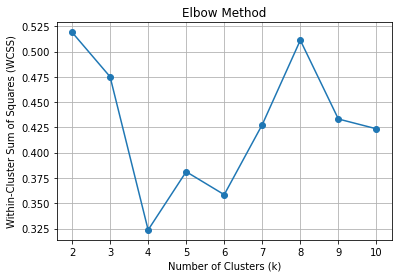

In [0]:
from pyspark.ml.evaluation import ClusteringEvaluator

# Initialize a list to store the WCSS values for different cluster numbers
wcss_values = []

# Define a range of cluster numbers to try
k_values = range(2, 11)  # You can adjust the range as needed

# Calculate WCSS for each k
for k in k_values:
    kmeans = KMeans().setK(k).setSeed(1)
    model = kmeans.fit(df_assembled)
    predictions = model.transform(df_assembled)
    evaluator = ClusteringEvaluator()
    wcss = evaluator.evaluate(predictions)
    wcss_values.append(wcss)

# Plot the elbow curve
plt.plot(k_values, wcss_values, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()



**Se puede observar que K=4 es decir 4 clusters es el mejor número de clusters porque tenemos menor Within-Cluster Sum of Squares (WCSS)**

In [0]:
from pyspark.ml.feature import IndexToString

# Assuming 'indexers' contains the StringIndexers used for encoding

# Create a list to store IndexToString transformers for each column
index_to_string_transformers = []

# Create IndexToString for each column
for indexer in indexers:
    column_name = indexer.getOutputCol()
    index_to_string_transformer = IndexToString(inputCol=column_name, outputCol=column_name+"_original")
    index_to_string_transformers.append(index_to_string_transformer)

df_temp = df_assembled.select(index_columns)
# Apply IndexToString to DataFrame
for transformer in index_to_string_transformers:
    try:
        df_temp = transformer.transform(df_temp)
    except:
        pass

In [0]:
index_columns = ['X_COORD_CD', 'Y_COORD_CD' 'AGE_GROUP_index', 'PERP_SEX_index']


In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming 'df' is your DataFrame and 'columns_to_encode' is a list of columns to encode
# Also assuming 'features_col' is the name of the column containing the feature vector
index_columns = ['PERP_SEX_index', 'OFNS_DESC_index']
df = df_filled.select(index_columns)

columns_to_encode = index_columns




k_values = range(2, 11)  # You can adjust the range as needed


# # Apply the pipeline to the DataFrame
# df_transformed = pipeline_model.transform(df)

for k in k_values:

    # Initialize a list to store stages of the pipeline
    stages = []

    # Apply OneHotEncoder to each column
    for column in columns_to_encode:
        encoder = OneHotEncoder(inputCol=column, outputCol=column+"_onehot")
        stages.append(encoder)

    # Assemble all feature columns into a single feature vector
    assembler = VectorAssembler(inputCols=[col + "_onehot" for col in columns_to_encode], outputCol="features")
    stages.append(assembler)

    # Define the KMeans model
    kmeans = KMeans().setK(k).setSeed(1)
    stages.append(kmeans)
    # Create a pipeline
    pipeline = Pipeline(stages=stages)

    # Fit the pipeline to the DataFrame
    pipeline_model = pipeline.fit(df)
    model = kmeans.fit(df_transformed)
    wcss = pipeline_model.stages[-1].computeCost(df_transformed)
    wcss_values.append(wcss)

# Plot the elbow curve
plt.plot(k_values, wcss_values, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/databricks/python/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<command-4319354726193746>", line 43, in <module>
    model = kmeans.fit(df_transformed)
  File "/databricks/python_shell/dbruntime/MLWorkloadsInstrumentation/_pyspark.py", line 30, in patched_method
    result = original_method(self, *args, **kwargs)
  File "/databricks/spark/python/pyspark/ml/base.py", line 205, in fit
    return self._fit(dataset)
  File "/databricks/spark/python/pyspark/ml/wrapper.py", line 383, in _fit
    java_model = self._fit_java(dataset)
  File "/databricks/spark/python/pyspark/ml/wrapper.py", line 380, in _fit_java
    return self._java_obj.fit(dataset._jdf)
  File "/databricks/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/java_gateway.py", line 1321, in __call__
    return_value = get_return_value(
  File "/databricks/spark/python/pyspark/errors/excepti

In [0]:
# Get the centroids
centroids = pipeline_model.stages[-1].clusterCenters()
print("Cluster Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: {centroid}")

# Show the clustered data with predictions
df_clustered = df_transformed.select("features", "prediction")
df_clustered.show()

# Get the count of data points in each cluster
cluster_counts = df_clustered.groupBy("prediction").count().orderBy("prediction")
print("Cluster Counts:")
cluster_counts.show()


Cluster Centroids:
Cluster 0: [8.26542612e-01 1.58351163e-01 0.00000000e+00 1.23750861e-01
 1.09416525e-01 8.13384240e-02 7.69920169e-02 6.44604809e-02
 5.73528878e-02 5.70472406e-02 5.52548010e-02 4.97997752e-02
 3.50820844e-02 3.26006434e-02 3.00673978e-02 2.66379324e-02
 2.57676149e-02 2.07166650e-02 1.94888957e-02 1.77897044e-02
 1.34070340e-02 1.10033000e-02 1.03609227e-02 1.01381629e-02
 9.37145462e-03 8.28355773e-03 7.82767713e-03 7.64636098e-03
 5.78139489e-03 3.84908280e-03 3.53307466e-03 3.26369066e-03
 3.05129175e-03 2.29494439e-03 2.10326732e-03 1.92713163e-03
 1.91677071e-03 1.38318319e-03 1.04645320e-03 9.63565815e-04
 8.02971513e-04 7.97791051e-04 7.92610590e-04 7.30445053e-04
 5.59489828e-04 5.23226599e-04 5.07685214e-04 3.88534603e-04
 3.52271373e-04 2.84925375e-04 2.59023069e-04 2.43481684e-04
 2.17579378e-04 1.91677071e-04 1.86496609e-04 1.13970150e-04
 8.80678433e-05 8.28873820e-05 5.18046137e-05 3.62632296e-05
 1.55413841e-05 1.55413841e-05 1.55413841e-05 1.0360922

In [0]:
df_filled.head()

Out[50]: Row(ARREST_DATE=datetime.date(2023, 1, 3), PD_CD='397', PD_DESC='ROBBERY,OPEN AREA UNCLASSIFIED', OFNS_DESC='ROBBERY', ARREST_BORO='B', ARREST_PRECINCT='49', AGE_GROUP='18-24', PERP_SEX='M', PERP_RACE='BLACK', X_COORD_CD='1027430', Y_COORD_CD='251104', Latitude='40.855793', Longitude='-73.843908', PD_CD_index=4.0, PD_DESC_index=4.0, OFNS_DESC_index=6.0, ARREST_BORO_index=1.0, ARREST_PRECINCT_index=36.0, AGE_GROUP_index=2.0, PERP_SEX_index=0.0, PERP_RACE_index=0.0, X_COORD_CD_index=40.0, Y_COORD_CD_index=40.0, Latitude_index=40.0, Longitude_index=40.0, Robbery_Binary=1, FELONY_ASSAULT_BINARY=0)

/databricks/spark/python/pyspark/sql/pandas/conversion.py:122: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)
/databricks/python/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


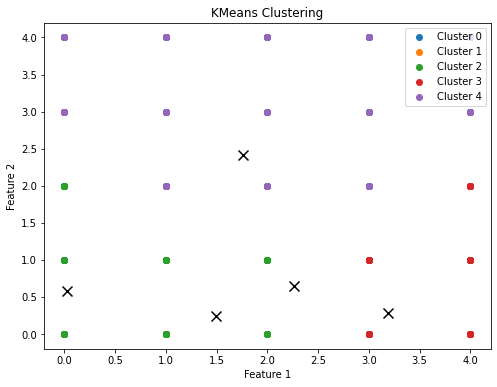

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Collect data locally
local_predictions = predictions.select('features', 'prediction').toPandas()

# Plot the clusters
plt.figure(figsize=(8, 6))

# Extract features and labels
x = local_predictions['features'].apply(lambda v: v[0])
y = local_predictions['features'].apply(lambda v: v[1])
labels = local_predictions['prediction']

# Plot each cluster
for label in set(labels):
    plt.scatter(x[labels == label], y[labels == label], label=f'Cluster {label}')

# Plot centroids
centroids = model.clusterCenters()
for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], marker='x', s=100, c='black')

plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [0]:

from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator



In [0]:

index_columns = [
    'ARREST_BORO_index',
    'AGE_GROUP_index',
    'PERP_RACE_index',
    'PERP_SEX_index',
     'FELONY_ASSAULT_BINARY' # Include PERP_RACE_index in the index_columns list
]

# Create a new DataFrame containing the selected index columns
data = df_filled.select(index_columns)

# Split the data into training and testing sets (80% training, 20% testing)
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)


In [0]:
data.describe()

Out[36]: DataFrame[summary: string, ARREST_BORO_index: string, AGE_GROUP_index: string, PERP_RACE_index: string, PERP_SEX_index: string, FELONY_ASSAULT_BINARY: string]

In [0]:
kmeans = KMeans().setK(2).setSeed(1)
model = kmeans.fit(dataset)


### Visualización de caracteristicas de los clusters: 
**Útilizando 4 clusters sugeridos según el método Elbow**


En el contexto del análisis de datos de arrestos, KMeans puede ser particularmente útil para:

- **Descubrir perfiles de arrestos**: Agrupar los datos de arrestos en clusters puede revelar perfiles distintos de actividades delictivas y comportamientos, lo que puede ser valioso para los cuerpos policiales y las políticas públicas.
- **Análisis demográfico**: Al considerar variables como edad, raza y género, se pueden identificar patrones demográficos en los datos de arrestos, lo que puede ayudar en el desarrollo de estrategias de intervención y prevención más efectivas.
- **Optimización de recursos**: Al entender cómo se distribuyen los eventos de arrestos en diferentes clusters, las autoridades pueden optimizar la asignación de recursos y esfuerzos en áreas y grupos que requieren más atención.

En resumen, KMeans es una herramienta poderosa y flexible que, cuando se aplica adecuadamente, puede proporcionar insights valiosos y accionables en el análisis de datos complejos como el de arrestos.

In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession

# Convertir columnas con índices de cadenas a características numéricas
index_columns = ['ARREST_BORO_index', 'AGE_GROUP_index', 'PERP_RACE_index', 'PERP_SEX_index']
df = df_filled.select(index_columns)

for col in index_columns:
    df = df.withColumn(col, df[col].cast('float'))

# Ensamblar características en un solo vector de características
feature_columns = index_columns
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_assembled = assembler.transform(df)

# Aplicar el clustering KMeans
kmeans = KMeans().setK(4).setSeed(1)  # Puedes establecer el número de clusters (K) según lo desees
model = kmeans.fit(df_assembled)

# Hacer predicciones
predictions = model.transform(df_assembled)

# Mostrar los resultados del clustering
predictions.select('features', 'prediction').show()

# Interpretar los resultados del clustering
cluster_centers = model.clusterCenters()
print("Centros de los Clusters:")
for center in cluster_centers:
    print(center)


+-----------------+----------+
|         features|prediction|
+-----------------+----------+
|[1.0,2.0,0.0,0.0]|         0|
|[4.0,0.0,3.0,0.0]|         2|
|    (4,[1],[3.0])|         0|
|[3.0,2.0,0.0,0.0]|         3|
|[1.0,0.0,0.0,1.0]|         1|
|        (4,[],[])|         0|
|[1.0,0.0,3.0,0.0]|         2|
|        (4,[],[])|         0|
|        (4,[],[])|         0|
|    (4,[0],[2.0])|         1|
|[1.0,1.0,0.0,1.0]|         0|
|[3.0,0.0,0.0,1.0]|         3|
|[3.0,2.0,0.0,0.0]|         3|
|[0.0,2.0,0.0,1.0]|         0|
|    (4,[1],[1.0])|         0|
|[1.0,2.0,0.0,1.0]|         0|
|    (4,[0],[3.0])|         3|
|    (4,[0],[1.0])|         1|
|[1.0,3.0,0.0,0.0]|         0|
|[3.0,0.0,3.0,1.0]|         2|
+-----------------+----------+
only showing top 20 rows

Centros de los Clusters:
[0.28063307 1.0302416  0.43184106 0.19729042]
[1.4662191  0.         0.65974296 0.20222177]
[1.81053659 0.73995122 3.40173171 0.23080488]
[2.82453208 0.99685571 0.49593725 0.19785857]


In [0]:
index_columns = ['ARREST_BORO_index', 'AGE_GROUP_index', 'PERP_RACE_index', 'PERP_SEX_index']
df = df_filled.select(index_columns)

for col in index_columns:
    df = df.withColumn(col, df[col].cast('float'))

# Ensamblar características en un solo vector de características
feature_columns = index_columns
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_assembled = assembler.transform(df)

# Aplicar el clustering KMeans
kmeans = KMeans().setK(4).setSeed(1)  # Puedes establecer el número de clusters (K) según lo desees
model = kmeans.fit(df_assembled)

# Obtener predicciones
predictions = model.transform(df_assembled)

# Agregar etiquetas de cluster al DataFrame original
df_with_clusters = df_assembled.withColumn("cluster", predictions["prediction"])

# Contar el número de puntos en cada cluster
df_with_clusters.groupBy("cluster").count().show()

# Convertir las predicciones a Pandas DataFrame para visualización
local_predictions = predictions.select('features', 'prediction').toPandas()

# Visualización de clusters
# 1. Gráficos de barras para columnas categóricas dentro de cada cluster
cat_columns = index_columns  # Ajusta según las columnas categóricas que deseas visualizar
for col in cat_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=local_predictions, x=col, hue='prediction')
    plt.title(f'Distribution of {col} by Cluster')
    plt.legend(title='Cluster')
    plt.xticks(rotation=45)
    plt.show()

# 2. Gráfico de dispersión para la distribución de clusters (si tienes dos dimensiones numéricas para visualización)
# Para este ejemplo, usaremos las dos primeras características
plt.figure(figsize=(10, 5))
sns.scatterplot(x=local_predictions['features'].apply(lambda v: v[0]),
                y=local_predictions['features'].apply(lambda v: v[1]),
                hue=local_predictions['prediction'], palette='viridis')
plt.title('Cluster Distribution (Scatter Plot of First Two Encoded Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

# Visualización de características de los clusters
plt.figure(figsize=(8, 6))
x = local_predictions['features'].apply(lambda v: v[0])
y = local_predictions['features'].apply(lambda v: v[1])
labels = local_predictions['prediction']

# Graficar cada cluster
for label in set(labels):
    plt.scatter(x[labels == label], y[labels == label], label=f'Cluster {label}')

# Graficar centroides
centroids = model.clusterCenters()
for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], marker='x', s=100, c='black')

plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
File <command-2359981341998285>:20
     17 predictions = model.transform(df_assembled)
     19 # Agregar etiquetas de cluster al DataFrame original
---> 20 df_with_clusters = df_assembled.withColumn("cluster", predictions["prediction"])
     22 # Contar el número de puntos en cada cluster
     23 df_with_clusters.groupBy("cluster").count().show()

File /databricks/spark/python/pyspark/instrumentation_utils.py:48, in _wrap_function.<locals>.wrapper(*args, **kwargs)
     46 start = time.perf_counter()
     47 try:
---> 48     res = func(*args, **kwargs)
     49     logger.log_success(
     50         module_name, class_name, function_name, time.perf_counter() - start, signature
     51     )
     52     return res

File /databricks/spark/python/pyspark/sql/dataframe.py:4758, in DataFrame.withColumn(self, colName, col)
   4753 if not isins

In [0]:


# Modelo usando clusters de K=4
# Convert string-indexed columns to numerical features
index_columns = ['ARREST_BORO_index', 'AGE_GROUP_index', 'PERP_RACE_index', 'PERP_SEX_index']
df = df_filled.select(index_columns)

for col in index_columns:
    df = df.withColumn(col, df[col].cast('float'))

# Assemble features into a single feature vector
feature_columns = index_columns
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
# Configurar VectorAssembler para transformar características
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_assembled = assembler.transform(df)

# Configurar y entrenar KMeans
kmeans = KMeans(k=3, seed=1, featuresCol="features", predictionCol="prediction")
model = kmeans.fit(df_assembled)

# Obtener predicciones
predictions = model.transform(df_assembled)




---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
File <command-2359981341998277>:24
     21 predictions = model.transform(test_data)
     22 local_predictions = predictions.select('features', 'prediction').toPandas()
---> 24 # Visualización de los clusters
     25 plt.figure(figsize=(8, 6))
     26 x = local_predictions['features'].apply(lambda v: v[0])

File /databricks/spark/python/pyspark/instrumentation_utils.py:48, in _wrap_function.<locals>.wrapper(*args, **kwargs)
     46 start = time.perf_counter()
     47 try:
---> 48     res = func(*args, **kwargs)
     49     logger.log_success(
     50         module_name, class_name, function_name, time.perf_counter() - start, signature
     51     )
     52     return res

File /databricks/spark/python/pyspark/sql/dataframe.py:4758, in DataFrame.withColumn(self, colName, col)
   4753 if not isinstance(col, Column):
   4754     raise PySp

In [0]:
# Agregar etiquetas de cluster al DataFrame original
df_with_clusters = df_assembled.join(predictions, on="features")

# Contar el número de puntos en cada cluster
df_with_clusters.groupBy("prediction").count().show()

# Convertir las predicciones a Pandas DataFrame para visualización
local_predictions = df_with_clusters.select('features', 'prediction').toPandas()

# Visualización de clusters
# 1. Gráficos de barras para columnas categóricas dentro de cada cluster
cat_columns = index_columns  # Ajusta según las columnas categóricas que deseas visualizar
for col in cat_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=local_predictions, x=col, hue='prediction')
    plt.title(f'Distribution of {col} by Cluster')
    plt.legend(title='Cluster')
    plt.xticks(rotation=45)
    plt.show()

# 2. Gráfico de dispersión para la distribución de clusters (si tienes dos dimensiones numéricas para visualización)
# Para este ejemplo, usaremos las dos primeras características
plt.figure(figsize=(10, 5))
sns.scatterplot(x=local_predictions['features'].apply(lambda v: v[0]),
                y=local_predictions['features'].apply(lambda v: v[1]),
                hue=local_predictions['prediction'], palette='viridis')
plt.title('Cluster Distribution (Scatter Plot of First Two Encoded Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()

# Visualización de características de los clusters
plt.figure(figsize=(8, 6))
x = local_predictions['features'].apply(lambda v: v[0])
y = local_predictions['features'].apply(lambda v: v[1])
labels = local_predictions['prediction']

# Graficar cada cluster
for label in set(labels):
    plt.scatter(x[labels == label], y[labels == label], label=f'Cluster {label}')

# Graficar centroides
centroids = model.clusterCenters()
for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], marker='x', s=100, c='black')

plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# 